In [444]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader.data as web
# import statsmodels.api as sm
import statsmodels.api as sm
import pandas_datareader.data as web
# Define the list of tickers and start and end dates
tickers=["WMT", "NKE", "JPM", "NVDA", "XOM", "MCD", "IBM", "DIG", "TSLA", "AMZN", "MSFT","USRT"]
start_date=date(2017,1,1)
end_date=date(2022,12,31)
n_equities=len(tickers)

In [445]:
# Download the historical data for the tickers from Yahoo Finance
df=yf.download(tickers,start_date,end_date)['Adj Close']



[*********************100%***********************]  12 of 12 completed


In [446]:
df.head()

,AMZN,DIG,IBM,JPM,MCD,MSFT,NKE,NVDA,TSLA,USRT,WMT,XOM
Date,,,,,,,,,,,,
2017-01-03,37.683498,48.721775,119.605820,73.235687,103.010803,57.501350,48.682541,25.142950,14.466000,39.255146,60.832005,66.807999
2017-01-04,37.859001,48.645294,121.086678,73.370766,102.890213,57.244076,49.703400,25.729565,15.132667,39.887665,61.186398,66.072945
2017-01-05,39.022499,48.295731,120.686066,72.695419,103.079681,57.244076,49.694046,25.076401,15.116667,39.983738,61.319283,65.087982
2017-01-06,39.799500,48.295731,121.279846,72.703842,103.992485,57.740246,50.490124,25.411610,15.267333,40.071796,60.477608,65.051231
2017-01-09,39.846001,46.853733,119.934921,72.754486,103.708305,57.556477,49.993744,26.441874,15.418667,39.615444,60.876308,63.978100


In [447]:
# Calculate daily percentage returns for each ticker
returns = df.pct_change().dropna()

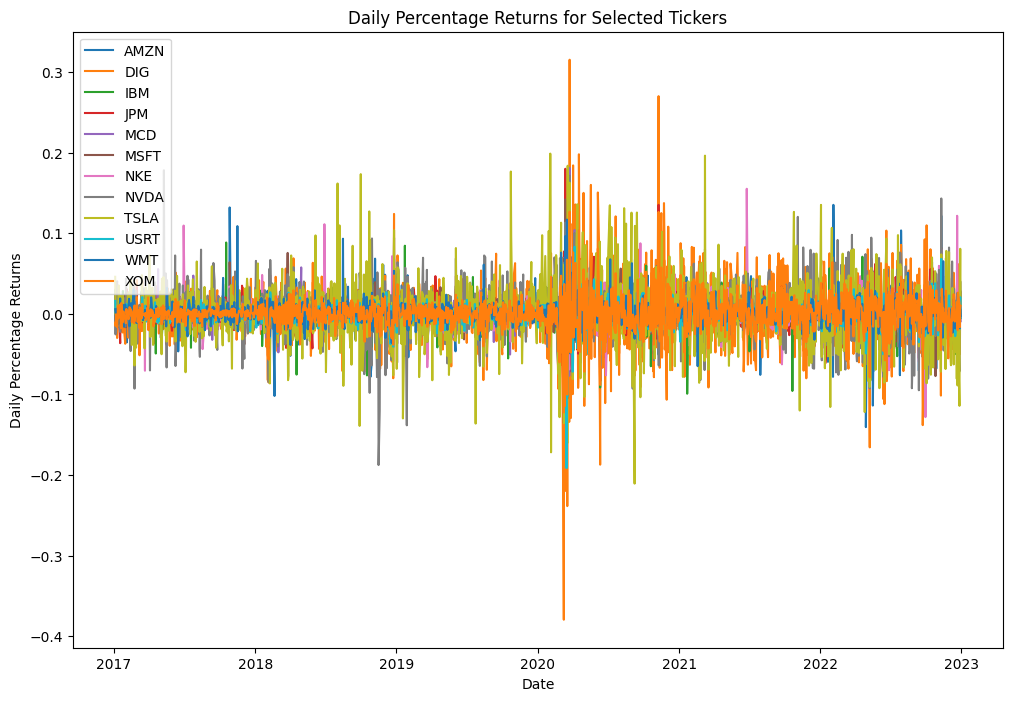

In [448]:
# # Plot the daily percentage returns for each ticker
fig, ax = plt.subplots(figsize=(12,8))
for col in returns.columns:
    ax.plot(returns.index, returns[col], label=col)
ax.set_xlabel('Date')
ax.set_ylabel('Daily Percentage Returns')
ax.set_title('Daily Percentage Returns for Selected Tickers')
ax.legend(loc='upper left')
plt.show()


In [449]:
# Calculate the APY and APR for each ticker
apy = (1 + returns).cumprod()**(252/len(returns)) - 1
apr = (1 + returns.mean())**252 - 1

In [450]:
apr

AMZN    0.210260
DIG     0.216208
IBM     0.060924
JPM     0.155702
MCD     0.198773
MSFT    0.323106
NKE     0.216639
NVDA    0.521715
TSLA    0.726725
USRT    0.067959
WMT     0.181009
XOM     0.140221
dtype: float64

In [451]:
apy

,AMZN,DIG,IBM,JPM,MCD,MSFT,NKE,NVDA,TSLA,USRT,WMT,XOM
Date,,,,,,,,,,,,
2017-01-04,0.000776,-0.000262,0.002057,0.000308,-0.000196,-0.000749,0.003472,0.003859,0.007552,0.002673,0.000971,-0.001846
2017-01-05,0.005848,-0.001466,0.001503,-0.001236,0.000112,-0.000749,0.003440,-0.000443,0.007374,0.003076,0.001333,-0.004346
2017-01-06,0.009165,-0.001466,0.002324,-0.001216,0.001585,0.000693,0.006107,0.001777,0.009044,0.003444,-0.000975,-0.004440
2017-01-09,0.009362,-0.006508,0.000459,-0.001100,0.001128,0.000160,0.004448,0.008447,0.010708,0.001527,0.000122,-0.007202
2017-01-10,0.009146,-0.009862,-0.001675,-0.000617,0.000878,0.000107,0.003598,0.007172,0.009676,0.000102,-0.001049,-0.009328
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.146062,-0.023211,0.026557,0.101023,0.171689,0.267832,0.155905,0.350558,0.429955,0.038786,0.153674,0.083264
2022-12-27,0.141046,-0.019736,0.027487,0.101666,0.171154,0.266257,0.158070,0.333964,0.401318,0.038646,0.153728,0.085763
2022-12-28,0.138229,-0.028089,0.024575,0.102669,0.169883,0.264079,0.153786,0.332620,0.408957,0.035473,0.150327,0.082764


In [452]:
# The apy DataFrame calculates the annualized percentage yield (APY) 
# for each ticker by taking the cumulative product of the daily percentage 
# returns, annualizing it using the number of trading days in a year (252), 
# and subtracting 1. The apr DataFrame calculates the annualized percentage 
# rate (APR) for each ticker by taking the mean of the daily percentage 
# returns, annualizing it using the number of trading days in a year (252), 
# and subtracting 1.

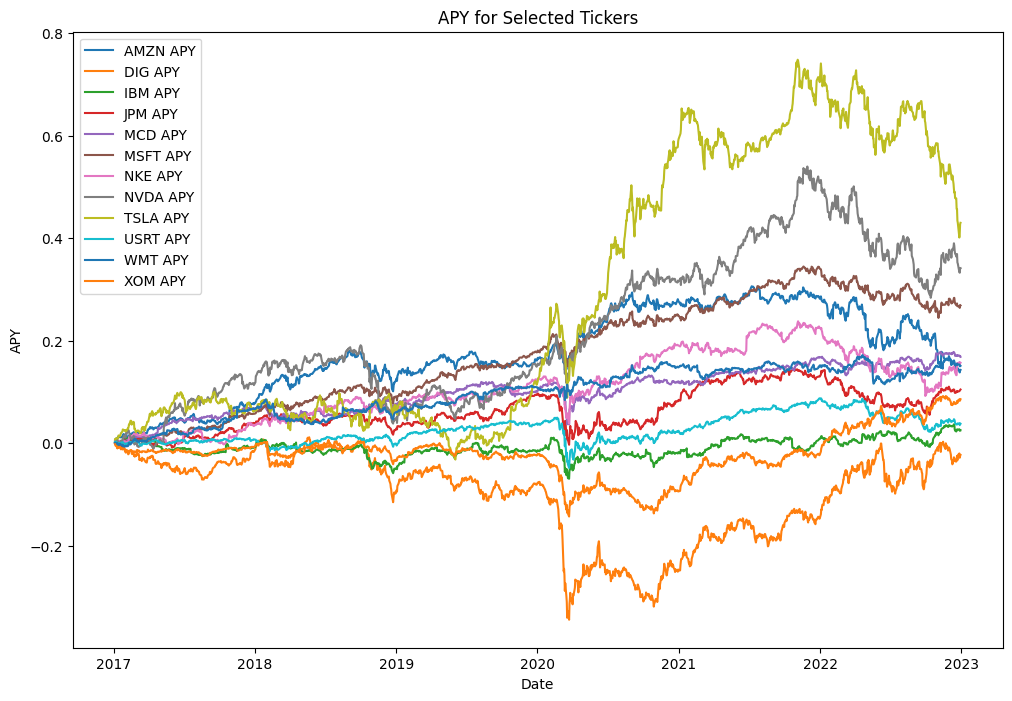

In [453]:
# Plot the APY for each ticker
fig2, ax2 = plt.subplots(figsize=(12,8))
for col in apy.columns:
    ax2.plot(apy.index, apy[col], label=col + ' APY')
ax2.set_xlabel('Date')
ax2.set_ylabel('APY')
ax2.set_title('APY for Selected Tickers')
ax2.legend(loc='upper left')

In [454]:
# Calculate the covariance and correlation matrix for the returns
cov_matrix = returns.cov()
corr_matrix = returns.corr()


In [455]:
corr_matrix

,AMZN,DIG,IBM,JPM,MCD,MSFT,NKE,NVDA,TSLA,USRT,WMT,XOM
AMZN,1.000000,0.249817,0.312755,0.312285,0.286305,0.709465,0.435444,0.616171,0.420781,0.353877,0.290833,0.215681
DIG,0.249817,1.000000,0.515430,0.640904,0.411131,0.368027,0.394167,0.320197,0.242356,0.522717,0.182500,0.923914
IBM,0.312755,0.515430,1.000000,0.577194,0.455822,0.478927,0.418184,0.347347,0.206552,0.539509,0.312389,0.505760
JPM,0.312285,0.640904,0.577194,1.000000,0.513333,0.491574,0.489536,0.382666,0.262378,0.616553,0.265785,0.594744
MCD,0.286305,0.411131,0.455822,0.513333,1.000000,0.493191,0.454879,0.352666,0.281746,0.608591,0.313475,0.380516
MSFT,0.709465,0.368027,0.478927,0.491574,0.493191,1.000000,0.538835,0.687880,0.448368,0.544788,0.389118,0.335681
NKE,0.435444,0.394167,0.418184,0.489536,0.454879,0.538835,1.000000,0.477550,0.323101,0.522869,0.289796,0.373718
NVDA,0.616171,0.320197,0.347347,0.382666,0.352666,0.687880,0.477550,1.000000,0.460770,0.398880,0.288947,0.274715
TSLA,0.420781,0.242356,0.206552,0.262378,0.281746,0.448368,0.323101,0.460770,1.000000,0.311516,0.152830,0.190167
USRT,0.353877,0.522717,0.539509,0.616553,0.608591,0.544788,0.522869,0.398880,0.311516,1.000000,0.334145,0.486058


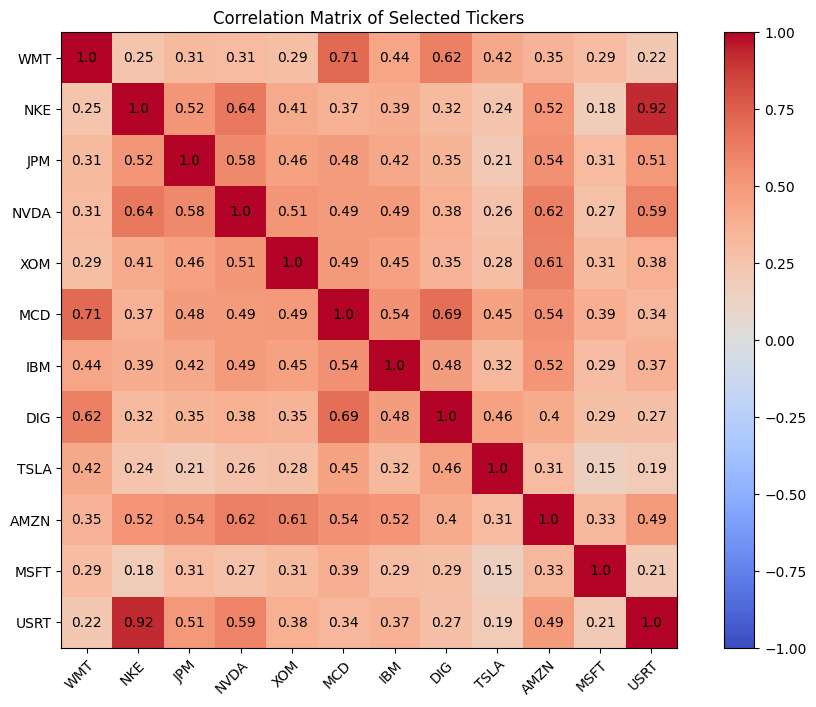

In [456]:
# Plot the correlation matrix as a heatmap
fig, ax = plt.subplots(figsize=(12,8))
im = ax.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
ax.set_xticks(np.arange(len(tickers)))
ax.set_yticks(np.arange(len(tickers)))
ax.set_xticklabels(tickers)
ax.set_yticklabels(tickers)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
for i in range(len(tickers)):
    for j in range(len(tickers)):
        text = ax.text(j, i, round(corr_matrix.iloc[i, j],2), ha="center", va="center", color="black")
ax.set_title("Correlation Matrix of Selected Tickers")
fig.colorbar(im, ax=ax)
plt.show()

In [457]:
cov_matrix

,AMZN,DIG,IBM,JPM,MCD,MSFT,NKE,NVDA,TSLA,USRT,WMT,XOM
AMZN,0.000453,0.000220,0.000109,0.000126,0.000087,0.000276,0.000186,0.000414,0.000347,0.000112,0.000089,0.000090
DIG,0.000220,0.001704,0.000348,0.000501,0.000241,0.000277,0.000326,0.000417,0.000388,0.000320,0.000108,0.000751
IBM,0.000109,0.000348,0.000267,0.000178,0.000106,0.000143,0.000137,0.000179,0.000131,0.000131,0.000073,0.000163
JPM,0.000126,0.000501,0.000178,0.000358,0.000138,0.000170,0.000185,0.000229,0.000192,0.000173,0.000072,0.000221
MCD,0.000087,0.000241,0.000106,0.000138,0.000202,0.000128,0.000129,0.000158,0.000155,0.000128,0.000064,0.000106
MSFT,0.000276,0.000277,0.000143,0.000170,0.000128,0.000333,0.000197,0.000396,0.000317,0.000148,0.000102,0.000121
NKE,0.000186,0.000326,0.000137,0.000185,0.000129,0.000197,0.000400,0.000302,0.000251,0.000155,0.000083,0.000147
NVDA,0.000414,0.000417,0.000179,0.000229,0.000158,0.000396,0.000302,0.000997,0.000564,0.000187,0.000131,0.000171
TSLA,0.000347,0.000388,0.000131,0.000192,0.000155,0.000317,0.000251,0.000564,0.001503,0.000179,0.000085,0.000145
USRT,0.000112,0.000320,0.000131,0.000173,0.000128,0.000148,0.000155,0.000187,0.000179,0.000220,0.000071,0.000142


# CAPM 

In [458]:
# The risk_free_rate variable is set to the current 10-year US 
# Treasury yield as a proxy for the risk-free rate. The market_returns 
# variable is calculated using the daily percentage returns of the S&P 500 
# index

In [459]:
# Calculate the risk-free rate (using 10-year US Treasury yield as proxy)
risk_free_rate = 0.0165

# Calculate the market risk premium (using the S&P 500 as proxy for market returns)
market_returns = yf.download("SPY",start_date,end_date)['Adj Close'].pct_change()
market_risk_premium = market_returns.mean() - risk_free_rate


[*********************100%***********************]  1 of 1 completed


In [460]:
market_returns.dropna(inplace=True)

In [461]:
market_returns.mean()

0.0004989502815127862

In [462]:
market_returns.isnull()

Date
2017-01-04    False
2017-01-05    False
2017-01-06    False
2017-01-09    False
2017-01-10    False
              ...  
2022-12-23    False
2022-12-27    False
2022-12-28    False
2022-12-29    False
2022-12-30    False
Name: Adj Close, Length: 1509, dtype: bool

In [463]:
market_returns.head()

Date
2017-01-04    0.005949
2017-01-05   -0.000795
2017-01-06    0.003578
2017-01-09   -0.003301
2017-01-10    0.000000
Name: Adj Close, dtype: float64

In [464]:
market_risk_premium

-0.016001049718487214

In [465]:
# The expected returns can be thought of as the annual returns an 
#investor can anticipate earning on each stock based on the CAPM model.

In [466]:
# Calculate the expected returns using the CAPM
market_return = returns.mean().mean()
expected_returns = []
for ticker in tickers:
    beta = sm.OLS(returns[ticker], sm.add_constant(returns.mean(axis=1))).fit().params[0]
    expected_return = risk_free_rate + beta * (market_return - risk_free_rate)
    expected_returns.append(expected_return)


In [467]:
# Create a dataframe of the expected returns
expected_returns_df = pd.DataFrame(expected_returns, index=tickers, columns=['Expected Return'])


In [468]:
expected_returns_df #This daily

,Expected Return
WMT,0.010087
NKE,0.002450
JPM,0.002195
NVDA,-0.006822
XOM,0.002418
MCD,0.007253
IBM,0.005450
DIG,-0.015005
TSLA,-0.007457
AMZN,0.002393


In [469]:
# Alpha is a measure of the active return on an investment, the 
# performance of that investment compared with a 
# suitable market index

In [470]:
# Calculate beta and alpha for each stock
betas = []
alphas = []
for ticker in tickers:
    X = sm.add_constant(market_returns)
    Y = returns[ticker]
    model = sm.OLS(Y, X).fit()
    beta = model.params[1]
    alpha = model.params[0]
    betas.append(beta)
    alphas.append(alpha)

In [471]:
# Print alphas and expected returns for each stock (daily)
for i, ticker in enumerate(tickers):
    print(f"{ticker} alpha: {alphas[i]:.4f}, expected return: {expected_returns[i]:.4f}")

WMT alpha: 0.0004, expected return: 0.0101
NKE alpha: 0.0002, expected return: 0.0024
JPM alpha: 0.0000, expected return: 0.0022
NVDA alpha: 0.0008, expected return: -0.0068
XOM alpha: 0.0001, expected return: 0.0024
MCD alpha: 0.0004, expected return: 0.0073
IBM alpha: -0.0002, expected return: 0.0055
DIG alpha: -0.0003, expected return: -0.0150
TSLA alpha: 0.0014, expected return: -0.0075
AMZN alpha: 0.0002, expected return: 0.0024
MSFT alpha: 0.0005, expected return: 0.0018
USRT alpha: -0.0002, expected return: 0.0054


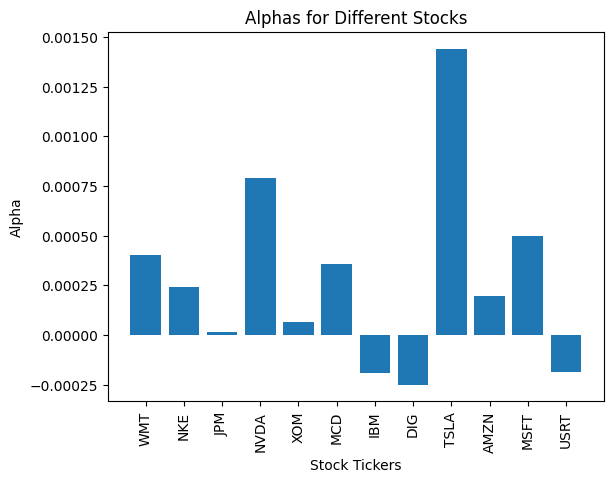

In [472]:
# Create a bar chart of alphas
plt.bar(tickers, alphas)
plt.xticks(rotation=90)
plt.xlabel('Stock Tickers')
plt.ylabel('Alpha')
plt.title('Alphas for Different Stocks')
plt.show()

In [473]:
# Calculate the covariance matrix
covariance_matrix = np.cov(returns.T)

In [474]:
# Simulate 50,000 randomly chosen portfolios that put different weights in
#each of the stocks above and calculate the expected return and 
#standard deviation of those portfolios
n_simulations = 50000
np.random.seed(123)

In [475]:
simulation_results = np.zeros((n_simulations, n_equities + 2))
for i in range(n_simulations):
    # Generate random weights for the portfolio
    weights = np.random.rand(n_equities)
    weights /= np.sum(weights)

    # Calculate the expected return and standard deviation of the portfolio
    expected_return = np.dot(weights, expected_returns)
    standard_deviation = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))

    # Store the results in the simulation_results array
    simulation_results[i, 0] = expected_return
    simulation_results[i, 1] = standard_deviation
    simulation_results[i, 2:] = weights

# Create a dataframe of the simulation results
columns = ['Expected Return', 'Standard Deviation'] + tickers
simulation_df = pd.DataFrame(simulation_results, columns=columns)

In [476]:
# Print the first 5 rows of each dataframe
print("Daily Simulation Results:")
simulation_df.head()


Daily Simulation Results:


,Expected Return,Standard Deviation,WMT,NKE,JPM,NVDA,XOM,MCD,IBM,DIG,TSLA,AMZN,MSFT,USRT
0,0.000965,0.015074,0.106915,0.043925,0.034824,0.084632,0.110446,0.064951,0.150557,0.105128,0.073828,0.060194,0.052681,0.111917
1,-0.000171,0.014252,0.074652,0.010158,0.067753,0.125618,0.031063,0.029865,0.090478,0.090525,0.107985,0.144586,0.123313,0.104005
2,0.001483,0.015335,0.152139,0.068012,0.076189,0.048070,0.061853,0.132877,0.019396,0.091333,0.090735,0.103965,0.089675,0.065759
3,0.000494,0.016559,0.062489,0.130942,0.138384,0.073553,0.091451,0.016946,0.046504,0.060800,0.126973,0.036709,0.070797,0.144451
4,0.001099,0.014735,0.081698,0.096389,0.018971,0.129957,0.094842,0.085722,0.053906,0.047829,0.065584,0.107147,0.137682,0.080273


In [477]:
trading_days_per_year = 252 # Assuming 252 trading days in a year
# Create a dataframe of the annualized simulation results
annualized_simulation_results = simulation_results.copy()
annualized_simulation_results[:, 0] = annualized_simulation_results[:, 0] * trading_days_per_year
annualized_simulation_results[:, 1] = annualized_simulation_results[:, 1] * np.sqrt(trading_days_per_year)
annualized_simulation_df = pd.DataFrame(annualized_simulation_results, columns=columns)


In [478]:
annualized_simulation_df.head()

,Expected Return,Standard Deviation,WMT,NKE,JPM,NVDA,XOM,MCD,IBM,DIG,TSLA,AMZN,MSFT,USRT
0,0.243129,0.239285,0.106915,0.043925,0.034824,0.084632,0.110446,0.064951,0.150557,0.105128,0.073828,0.060194,0.052681,0.111917
1,-0.043183,0.226244,0.074652,0.010158,0.067753,0.125618,0.031063,0.029865,0.090478,0.090525,0.107985,0.144586,0.123313,0.104005
2,0.373814,0.243429,0.152139,0.068012,0.076189,0.048070,0.061853,0.132877,0.019396,0.091333,0.090735,0.103965,0.089675,0.065759
3,0.124543,0.262873,0.062489,0.130942,0.138384,0.073553,0.091451,0.016946,0.046504,0.060800,0.126973,0.036709,0.070797,0.144451
4,0.276952,0.233913,0.081698,0.096389,0.018971,0.129957,0.094842,0.085722,0.053906,0.047829,0.065584,0.107147,0.137682,0.080273


# Optimal Portfolio

In [479]:
# Calculate the Sharpe ratio for each simulated portfolio
risk_free_rate = 0.0165
sharpe_ratios = (simulation_results[:, 0] - risk_free_rate) / simulation_results[:, 1]

# Find the index of the portfolio with the highest Sharpe ratio
optimal_portfolio_index = np.argmax(sharpe_ratios)

# Get the weights of the optimal portfolio
optimal_weights = simulation_results[optimal_portfolio_index, 2:]

# Print the optimal portfolio
print("Optimal Portfolio:")
for i, ticker in enumerate(tickers):
    print(f"{ticker}: {optimal_weights[i]:.4f}")

# Calculate the expected return and standard deviation of the optimal portfolio
optimal_expected_return = simulation_results[optimal_portfolio_index, 0]
optimal_standard_deviation = simulation_results[optimal_portfolio_index, 1]

Optimal Portfolio:
WMT: 0.2170
NKE: 0.2952
JPM: 0.0892
NVDA: 0.0355
XOM: 0.0207
MCD: 0.0627
IBM: 0.0302
DIG: 0.0010
TSLA: 0.0861
AMZN: 0.0496
MSFT: 0.0055
USRT: 0.1071


In [480]:
print(f"\nExpected Return: {optimal_expected_return:.4f}")
print(f"Standard Deviation: {optimal_standard_deviation:.4f}")
print(f"Sharpe Ratio: {sharpe_ratios[optimal_portfolio_index]:.4f}")


Expected Return: 0.0036
Standard Deviation: 0.0203
Sharpe Ratio: -0.6353


In [481]:
# Calculate annualized expected return and standard deviation for the optimal portfolio
optimal_expected_return = np.dot(optimal_weights, expected_returns) * 252
optimal_standard_deviation = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights))) * np.sqrt(252)

# Calculate Sharpe ratio for the optimal portfolio
optimal_sharpe_ratio = (optimal_expected_return - risk_free_rate) / optimal_standard_deviation

print("Annualized Expected Return for Optimal Portfolio: {:.2%}".format(optimal_expected_return))
print("Annualized Standard Deviation for Optimal Portfolio: {:.2%}".format(optimal_standard_deviation))
print("Sharpe Ratio for Optimal Portfolio: {:.2f}".format(optimal_sharpe_ratio))


Annualized Expected Return for Optimal Portfolio: 90.43%
Annualized Standard Deviation for Optimal Portfolio: 32.26%
Sharpe Ratio for Optimal Portfolio: 2.75


# Efficiency Frontier

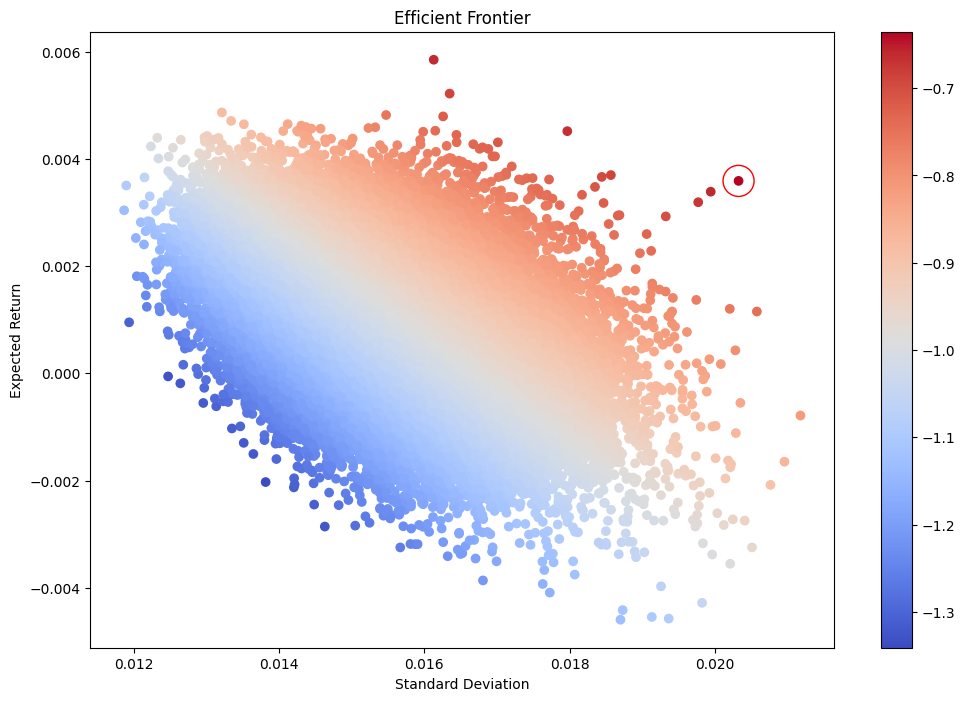

In [482]:
# Calculate the Sharpe ratio for each portfolio
sharpe_ratios = (simulation_results[:, 0] - risk_free_rate) / simulation_results[:, 1]

# Find the portfolio with the highest Sharpe ratio
max_sharpe_index = np.argmax(sharpe_ratios)

# Plot the results
plt.figure(figsize=(12,8))
plt.scatter(simulation_results[:, 1], simulation_results[:, 0], c=sharpe_ratios, cmap='coolwarm')
plt.colorbar()
plt.scatter(simulation_results[max_sharpe_index, 1], simulation_results[max_sharpe_index, 0], marker='o', s=500, edgecolors='red', facecolors='none')
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.show()

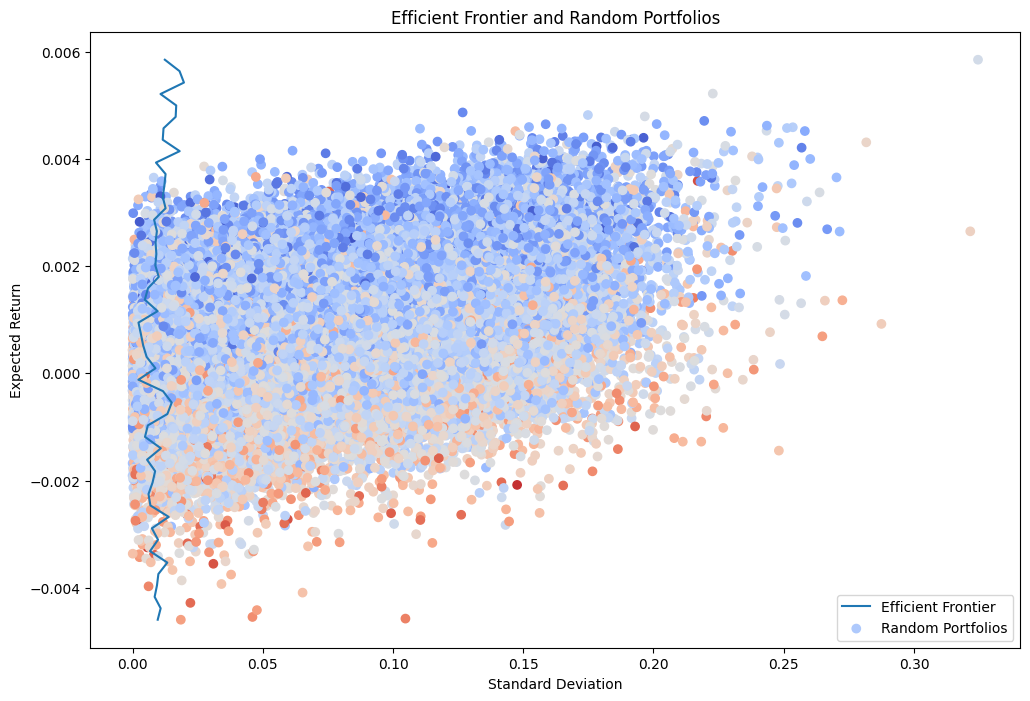

In [484]:
# Define the optimization problem
def portfolio_objective(weights, cov_matrix):
    return np.dot(weights, np.dot(cov_matrix, weights))

def portfolio_constraint(weights, expected_returns, target_return):
    return np.dot(weights, expected_returns) - target_return

constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
bounds = [(0, 1) for _ in range(n_equities)]

ef_portfolios = []
for target_return in np.linspace(simulation_results[:, 0].min(), simulation_results[:, 0].max(), num=50):
    # Set up the optimization problem
    problem = {'fun': lambda x: portfolio_objective(x, covariance_matrix),
               'constraints': [{'type': 'eq', 'fun': lambda x: portfolio_constraint(x, expected_returns, target_return)}],
               'bounds': bounds,
               'x0': np.random.rand(n_equities)}

    # Solve the optimization problem
    result = minimize(**problem)
    if result.success:
        ef_portfolios.append(result.x)
    else:
        print("Optimization failed")

ef_portfolios = np.array(ef_portfolios)

# Calculate the expected return and standard deviation of each optimal portfolio
ef_returns = np.dot(ef_portfolios, expected_returns)
ef_std = np.sqrt(np.diag(np.dot(np.dot(ef_portfolios, covariance_matrix), ef_portfolios.T)))

# Plot the efficiency frontier
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(ef_std, ef_returns, label="Efficient Frontier")
ax.scatter(simulation_results[:, 2], simulation_results[:, 0], c=simulation_results[:, 1], cmap='coolwarm', label="Random Portfolios")
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Expected Return')
ax.set_title('Efficient Frontier and Random Portfolios')
ax.legend()
plt.show()


# Why USRT is less risky